In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
df = read_csv(
    'https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/women-stem.csv'
)

Parsed with column specification:
cols(
  Rank = col_double(),
  Major_code = col_double(),
  Major = col_character(),
  Major_category = col_character(),
  Total = col_double(),
  Men = col_double(),
  Women = col_double(),
  ShareWomen = col_double(),
  Median = col_double()
)


In [24]:
df2 = df %>% 
    select(ShareWomen, Major) %>% 
    mutate(ShareMen = 1 - ShareWomen) %>%
    gather(key, value, -Major) %>%
    arrange(desc(key), desc(value)) %>%
    mutate(Major = fct_inorder(Major))

df2 %>% print

# A tibble: 152 x 3
   Major                                                      key        value
   <fct>                                                      <chr>      <dbl>
 1 COMMUNICATION DISORDERS SCIENCES AND SERVICES              ShareWomen 0.968
 2 MEDICAL ASSISTING SERVICES                                 ShareWomen 0.928
 3 NURSING                                                    ShareWomen 0.896
 4 MISCELLANEOUS HEALTH MEDICAL PROFESSIONS                   ShareWomen 0.881
 5 NUTRITION SCIENCES                                         ShareWomen 0.864
 6 COMMUNITY AND PUBLIC HEALTH                                ShareWomen 0.792
 7 GENERAL MEDICAL AND HEALTH SERVICES                        ShareWomen 0.775
 8 HEALTH AND MEDICAL ADMINISTRATIVE SERVICES                 ShareWomen 0.764
 9 MEDICAL TECHNOLOGIES TECHNICIANS                           ShareWomen 0.754
10 NUCLEAR, INDUSTRIAL RADIOLOGY, AND BIOLOGICAL TECHNOLOGIES ShareWomen 0.750
# … with 142 more rows


In [41]:
topN = df2 %>%
    filter(key == 'ShareWomen') %>%
    top_n(10, wt = value) %>%
    pull(Major) %>%
    as.character()

In [37]:
df3 = df2 %>%
    filter(Major %in% topN) 

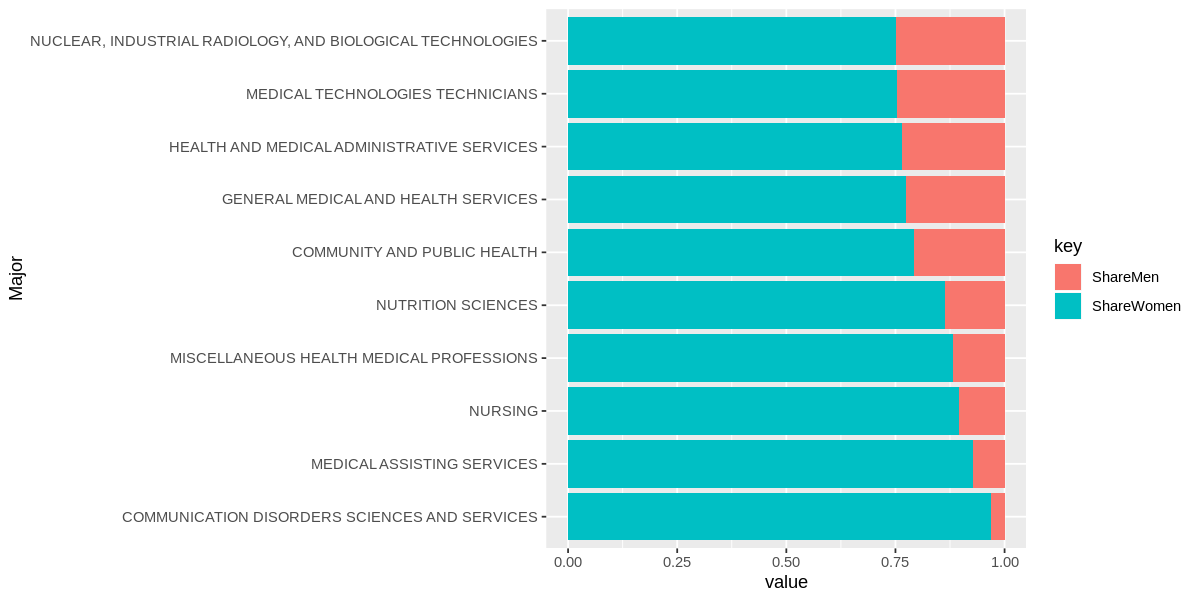

In [40]:
options(repr.plot.width = 10, repr.plot.height = 5)
p = ggplot(df3, aes(x = Major, y = value, fill = key))

p = p + geom_bar(stat = 'identity')

p = p + coord_flip()

p